In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

# 进行数据的预处理，解决是二分类的问题
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 进行数据的预处理，解决是二分类的问题
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

# 进行数据集的划分
train_x, test_x, train_y, test_y = train_test_split(X, y)

In [5]:
from Scripts.Logistic import Logistic

log_reg = Logistic()
log_reg.fit(train_x, train_y)

# 每个点到划分超平面的举例，在我们自己实现逻辑回归中有讲到过
decision_scores = log_reg.decision_function(test_x)

In [7]:
# 实现我们的TP
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def TPR(y_true, y_predict):
    return TP(y_true, y_predict) / (TP(y_true, y_predict) + FN(y_true, y_predict))

def FPR(y_true, y_predict):
    return FP(y_true, y_predict) / (FP(y_true, y_predict) + TN(y_true, y_predict))

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(test_y, y_predict))
    tprs.append(TPR(test_y, y_predict))

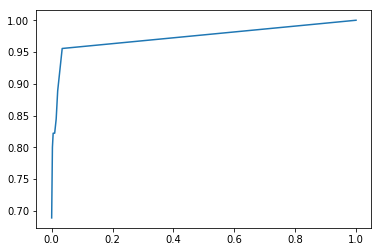

In [8]:
plt.plot(fprs, tprs)
plt.show()

END